#### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from sklearn.metrics import mean_squared_error

#### 2. Loading all the files

In [2]:
image_mean = np.load('numpy/Ex1_COCO_confidences_mean_1.npy')

In [3]:
image_standard_deviation = np.load('numpy/Ex1_COCO_confidences_std_1.npy')

In [4]:
images = np.load('../../../dataset/COCO/Ex1_COCO_image_1.npy')

In [5]:
noisy_images = np.load('../../../dataset/COCO/Ex1_COCO_noisy_images_1.npy')

In [6]:
def calculate_mse(true_images, predicted_images):
    mse_total = 0.0
    num_images = len(true_images)
    for i in range(num_images):
        mse_total += mean_squared_error(true_images[i].flatten(), predicted_images[i].flatten())
    return mse_total / num_images

In [7]:
mse = calculate_mse(image_mean, images)
print("Mean Square Error:", format(mse, '.6f'))

Mean Square Error: 0.002640


In [8]:
sum_standard_deviation = np.sum(image_standard_deviation,axis = (1,2,3))

In [9]:
top_indices = np.argsort(sum_standard_deviation)[-5:]
top_indices = list(reversed(top_indices))
bottom_indices = np.argsort(sum_standard_deviation)[:5]

In [10]:
print("Top 5 standard deviation sum per image are:")
for i in top_indices:
    print(sum_standard_deviation[i])

Top 5 standard deviation sum per image are:
4154.402953661607
3622.070826170279
3605.975854021987
3535.2934621958384
3386.8846869468452


In [11]:
print("Bottom 5 standard deviation sum per image are:")
for i in bottom_indices:
    print(sum_standard_deviation[i])

Bottom 5 standard deviation sum per image are:
1010.2408888298819
1068.7096881994944
1110.7322194735407
1125.215230859228
1143.0532607375842


In [12]:
def regressor_error_confidence_curve(y_pred, y_true, y_std, num_points=20, distribution="gaussian", error_metric="mae"):
    min_conf = y_std.min()
    max_conf = y_std.max()
    candidate_confs = np.linspace(min_conf, max_conf, num=num_points)

    out_confidences = []
    out_errors = []

    metric_fn = None
    metric_fn = lambda x, y: np.mean(np.abs(x - y))

    for confidence in candidate_confs:
        examples_idx = np.where(y_std >= confidence)[0]
        filt_preds = y_pred[examples_idx]
        filt_true = y_true[examples_idx]

        error = metric_fn(filt_true, filt_preds)
        out_confidences.append(confidence)
        out_errors.append(error)

    return np.array(out_confidences), np.array(out_errors)

In [13]:
mean_flatten = image_mean.flatten()
std_flatten = image_standard_deviation.flatten()
image_flatten = images.flatten()

In [14]:
output_confidences,output_errors = regressor_error_confidence_curve(mean_flatten,image_flatten,std_flatten)

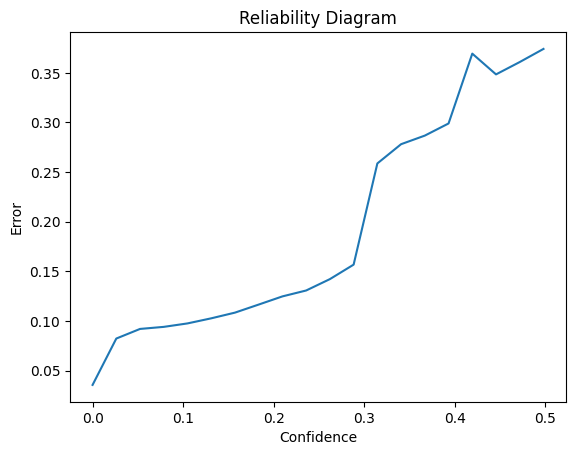

In [15]:
plt.plot(output_confidences, output_errors)   
# plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Confidence")
plt.ylabel("Error")
plt.title('Reliability Diagram')
plt.show()

In [16]:
std_min,std_max = image_standard_deviation.min(),image_standard_deviation.max()
print("Maximum standard deviation pixel wise in all the images is",std_max)
print("Minimum standard deviation pixel wise in all the images is",std_min)
new_min, new_max = 0, 1
std_p = (image_standard_deviation - std_min)/(std_max - std_min)*(new_max - new_min) + new_min

Maximum standard deviation pixel wise in all the images is 0.49796392824551555
Minimum standard deviation pixel wise in all the images is 0.0


In [17]:
def plot_results(original_image,noise_image, mean_image,std_image):
    w = 12
    h = 12
    fig = plt.figure(figsize=(w, h))
    columns = 4
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis('off')
    plt.title('Original Image')
    plt.imshow(original_image)

    fig.add_subplot(rows, columns, 2)
    plt.axis('off')
    plt.title('Image with Noise')
    plt.imshow(noise_image)

    fig.add_subplot(rows, columns, 3)
    plt.axis('off')
    plt.title('Mean Output Image')
    plt.imshow(mean_image)

    fig.add_subplot(rows, columns, 4)
    plt.axis('off')
    plt.title('Standard Deviation Image')
    plt.imshow(std_image,cmap="gray")
#     cax = plt.axes([0.95, 0.11, 0.02, 0.35])
    cax = plt.axes([0.95, 0.4, 0.02, 0.2])
    colorbar = plt.colorbar(cax =cax)
    ticks = np.array([ 0.2, 0.4, 0.6, 0.8, 1.0])
    tick_labels = ['Low', 'Medium', 'High', 'Very High', 'Max']
    # Set the tick locations and labels
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels(tick_labels)
    plt.text(0.5, -0.1, 'Level of uncertainty in each pixel ', ha='center', fontsize=12)
    plt.show()

In [18]:
def plot_std_results(std_p_0,std_p_1,std_p_2):
    w = 12
    h = 12
    fig = plt.figure(figsize=(w, h))
    columns = 3
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis('off')
    plt.title('STD along red channel')
    plt.imshow(std_p_0,cmap="gray")

    fig.add_subplot(rows, columns, 2)
    plt.axis('off')
    plt.title('STD along blue channel')
    plt.imshow(std_p_1,cmap="gray")

    fig.add_subplot(rows, columns, 3)
    plt.axis('off')
    plt.title('STD along green channel')
    plt.imshow(std_p_2,cmap="gray")
    cax = plt.axes([0.95, 0.38, 0.02, 0.23])
    colorbar = plt.colorbar(cax =cax)
    ticks = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
    tick_labels = ['Low', 'Medium', 'High', 'Very High', 'Max']
    # Set the tick locations and labels
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels(tick_labels)
    plt.text(0.5, -0.1, 'Level of uncertainty in each channel', ha='center', fontsize=12)
    plt.show()

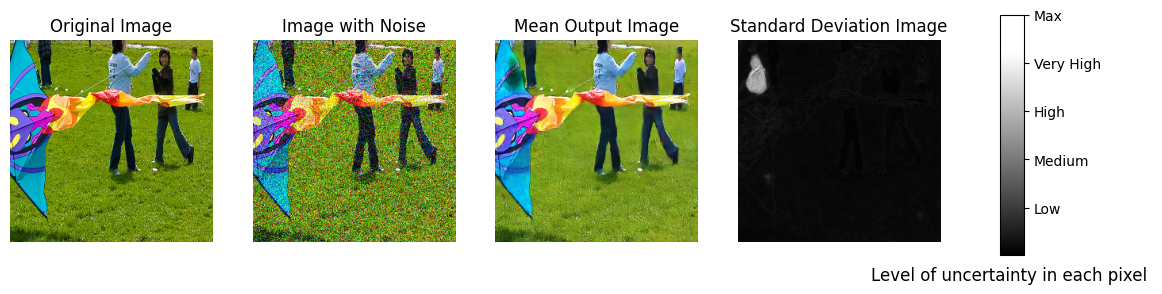

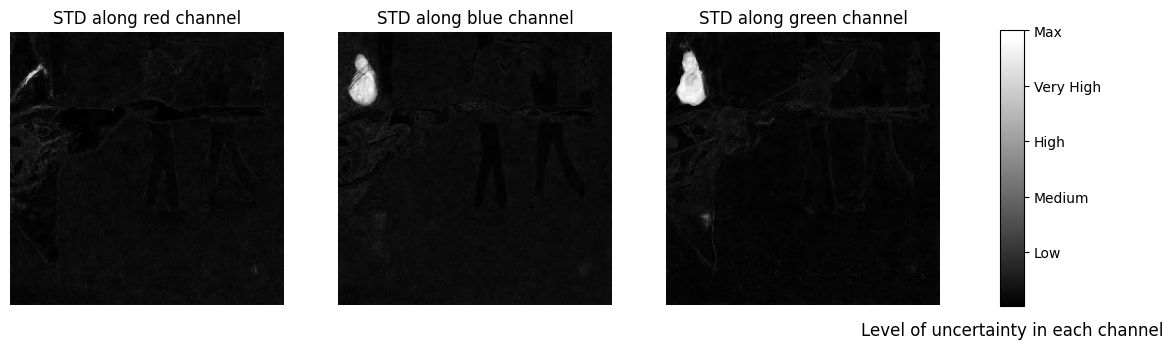

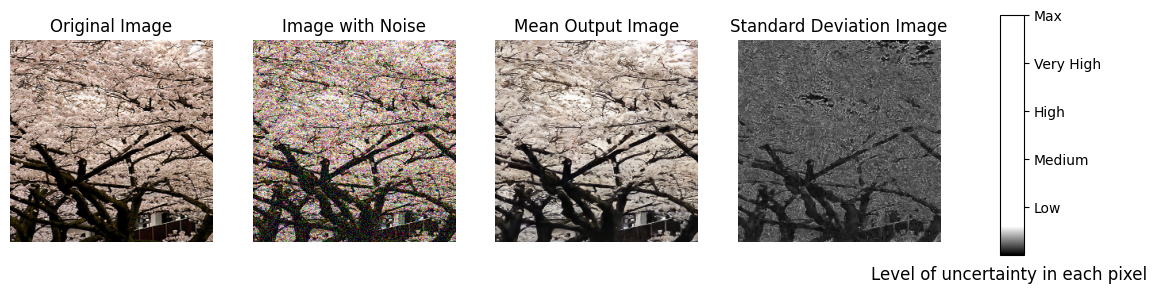

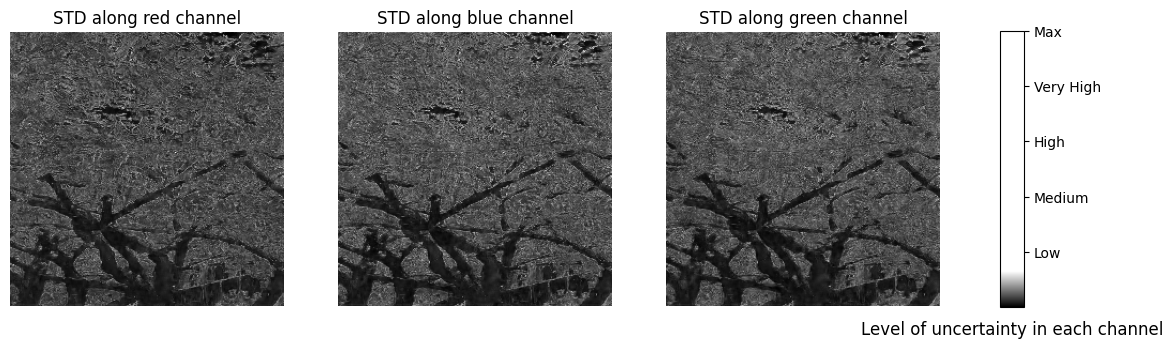

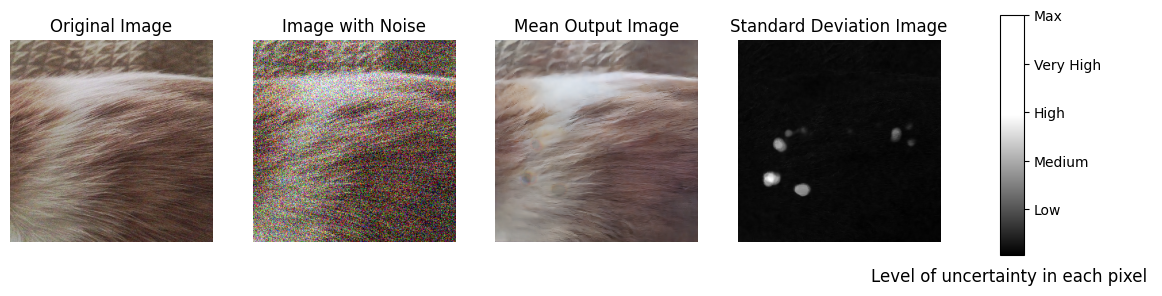

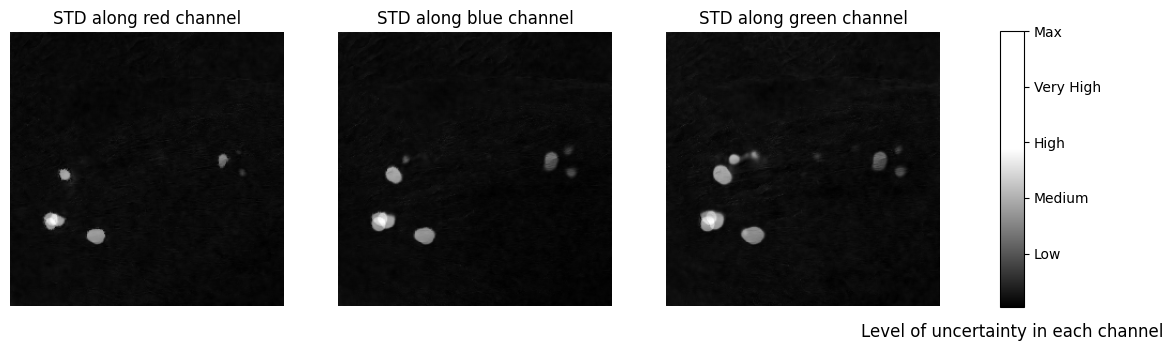

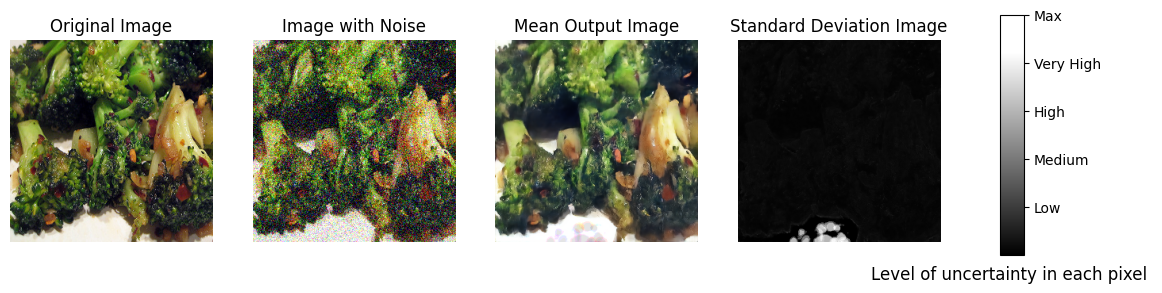

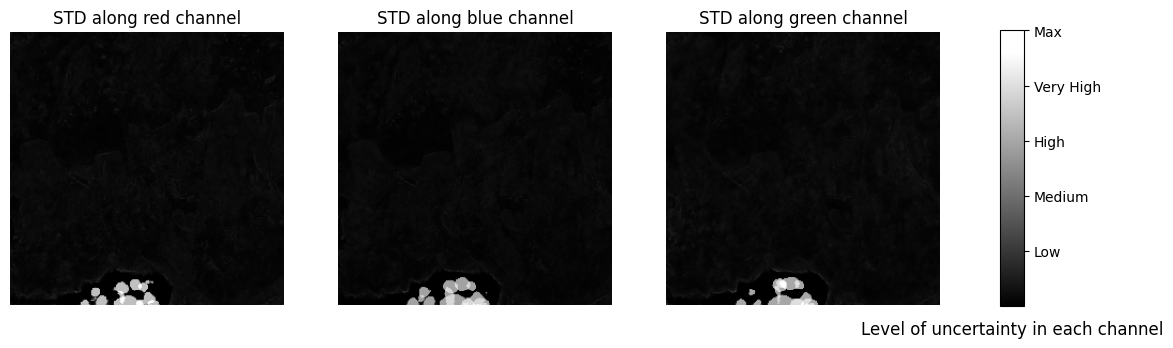

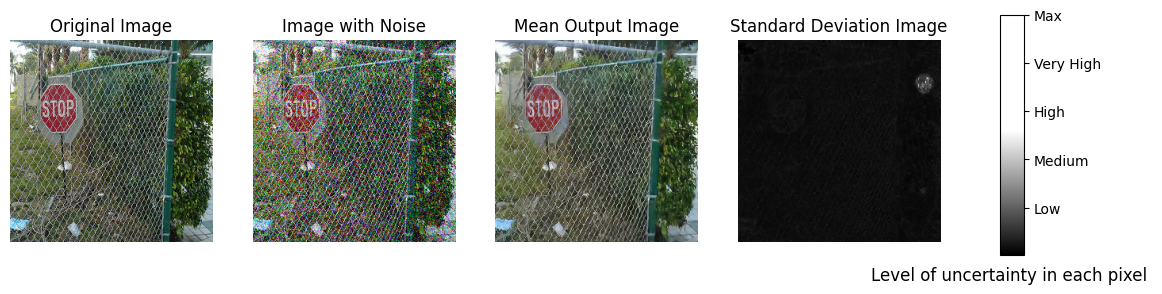

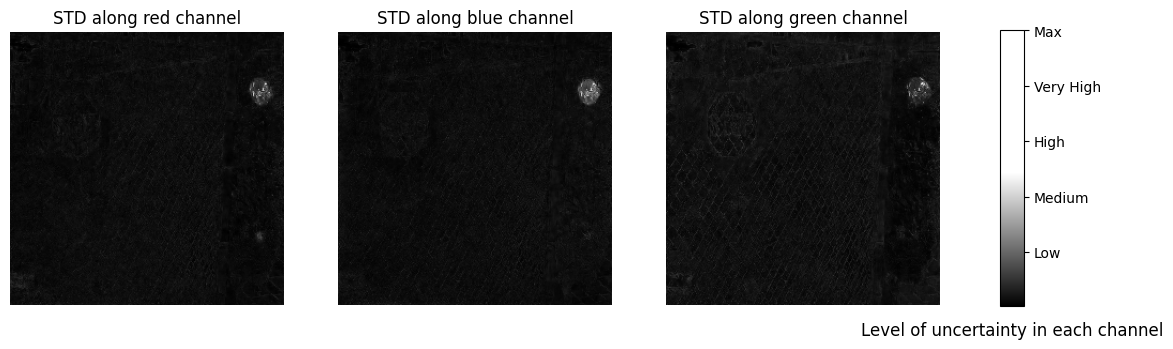

In [19]:
std_t_0 = np.expand_dims(std_p[top_indices[0],:,:,0],axis=-1)
std_t_1 = np.expand_dims(std_p[top_indices[0],:,:,1],axis=-1)
std_t_2 = np.expand_dims(std_p[top_indices[0],:,:,2],axis=-1)
sum_std_t = (std_t_0 + std_t_1 + std_t_2)/3
original_image = images[top_indices[0],:,:,:]
noisy_image = noisy_images[top_indices[0],:,:,:]
mean_image = image_mean[top_indices[0],:,:,:]
plot_results(original_image,noisy_image,mean_image,sum_std_t)
plot_std_results(std_t_0,std_t_1,std_t_2)
std_t_0 = np.expand_dims(std_p[top_indices[1],:,:,0],axis=-1)
std_t_1 = np.expand_dims(std_p[top_indices[1],:,:,1],axis=-1)
std_t_2 = np.expand_dims(std_p[top_indices[1],:,:,2],axis=-1)
sum_std_t = (std_t_0 + std_t_1 + std_t_2)/3
original_image = images[top_indices[1],:,:,:]
noisy_image = noisy_images[top_indices[1],:,:,:]
mean_image = image_mean[top_indices[1],:,:,:]
plot_results(original_image,noisy_image,mean_image,sum_std_t)
plot_std_results(std_t_0,std_t_1,std_t_2)
std_t_0 = np.expand_dims(std_p[top_indices[2],:,:,0],axis=-1)
std_t_1 = np.expand_dims(std_p[top_indices[2],:,:,1],axis=-1)
std_t_2 = np.expand_dims(std_p[top_indices[2],:,:,2],axis=-1)
sum_std_t = (std_t_0 + std_t_1 + std_t_2)/3
original_image = images[top_indices[2],:,:,:]
noisy_image = noisy_images[top_indices[2],:,:,:]
mean_image = image_mean[top_indices[2],:,:,:]
plot_results(original_image,noisy_image,mean_image,sum_std_t)
plot_std_results(std_t_0,std_t_1,std_t_2)
std_t_0 = np.expand_dims(std_p[top_indices[3],:,:,0],axis=-1)
std_t_1 = np.expand_dims(std_p[top_indices[3],:,:,1],axis=-1)
std_t_2 = np.expand_dims(std_p[top_indices[3],:,:,2],axis=-1)
sum_std_t = (std_t_0 + std_t_1 + std_t_2)/3
original_image = images[top_indices[3],:,:,:]
noisy_image = noisy_images[top_indices[3],:,:,:]
mean_image = image_mean[top_indices[3],:,:,:]
plot_results(original_image,noisy_image,mean_image,sum_std_t)
plot_std_results(std_t_0,std_t_1,std_t_2)
std_t_0 = np.expand_dims(std_p[top_indices[4],:,:,0],axis=-1)
std_t_1 = np.expand_dims(std_p[top_indices[4],:,:,1],axis=-1)
std_t_2 = np.expand_dims(std_p[top_indices[4],:,:,2],axis=-1)
sum_std_t = (std_t_0 + std_t_1 + std_t_2)/3
original_image = images[top_indices[4],:,:,:]
noisy_image = noisy_images[top_indices[4],:,:,:]
mean_image = image_mean[top_indices[4],:,:,:]
plot_results(original_image,noisy_image,mean_image,sum_std_t)
plot_std_results(std_t_0,std_t_1,std_t_2)

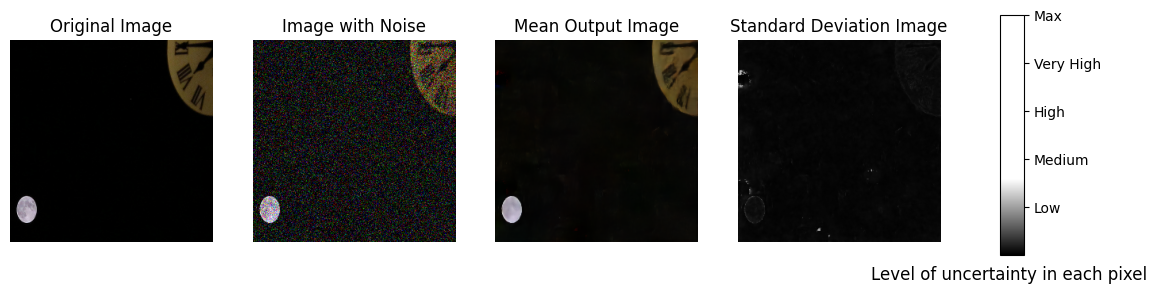

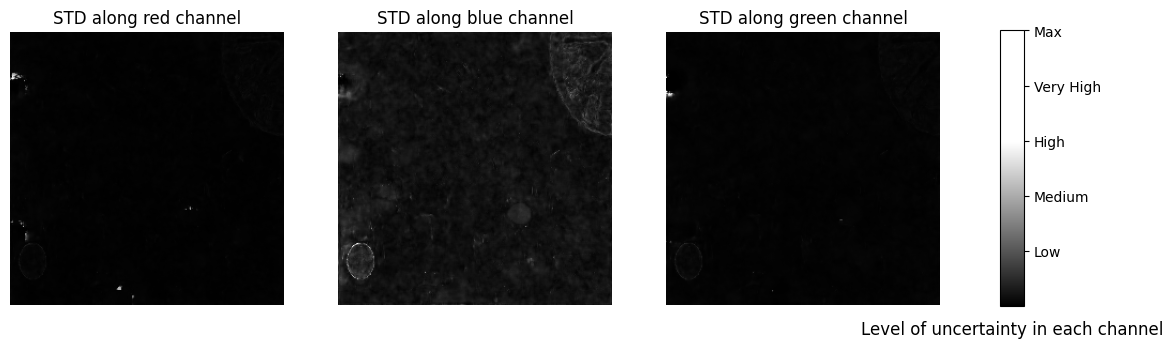

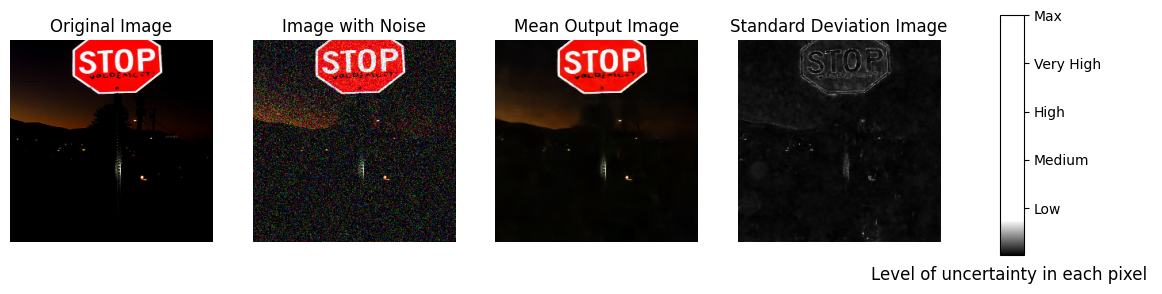

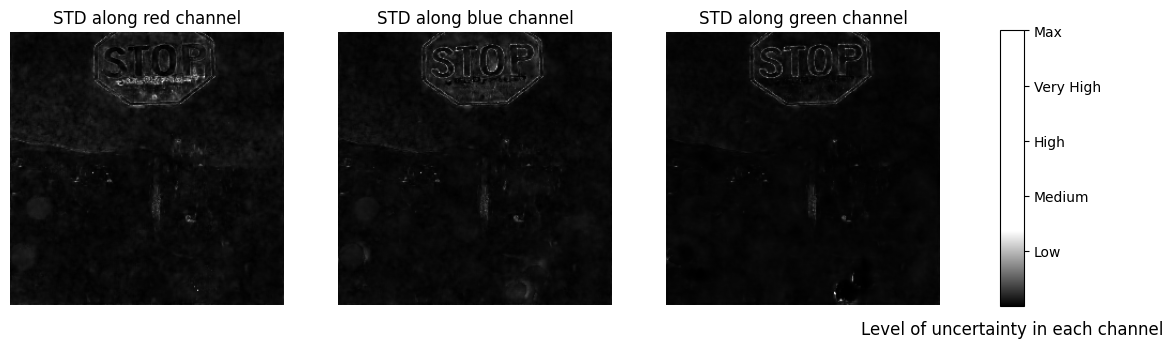

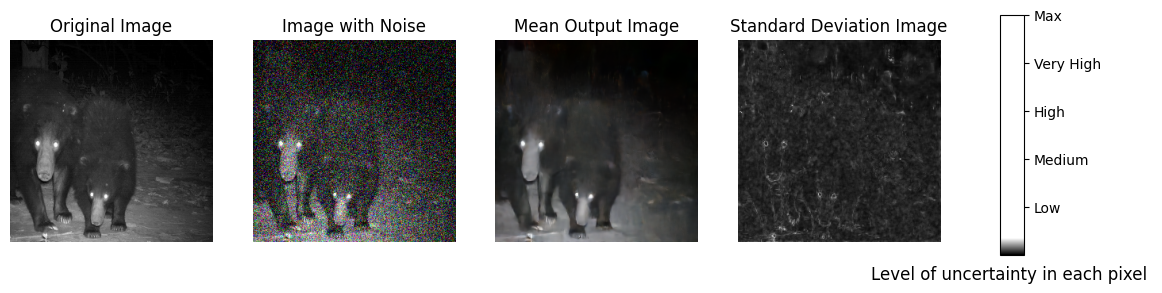

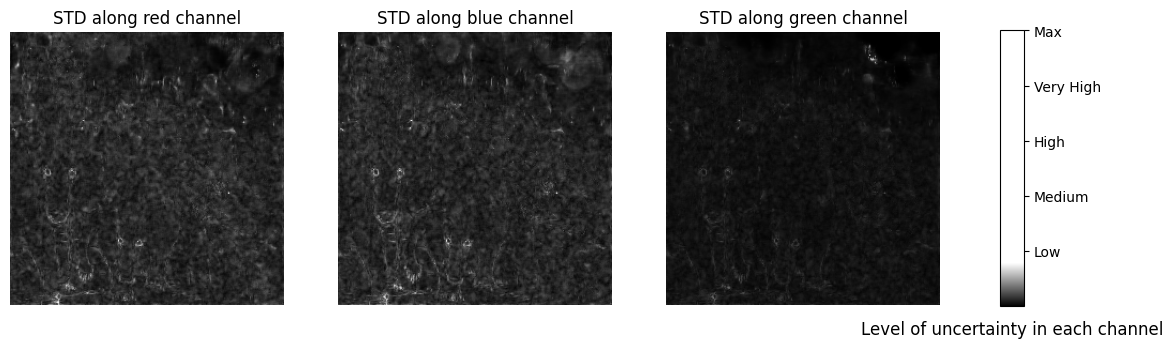

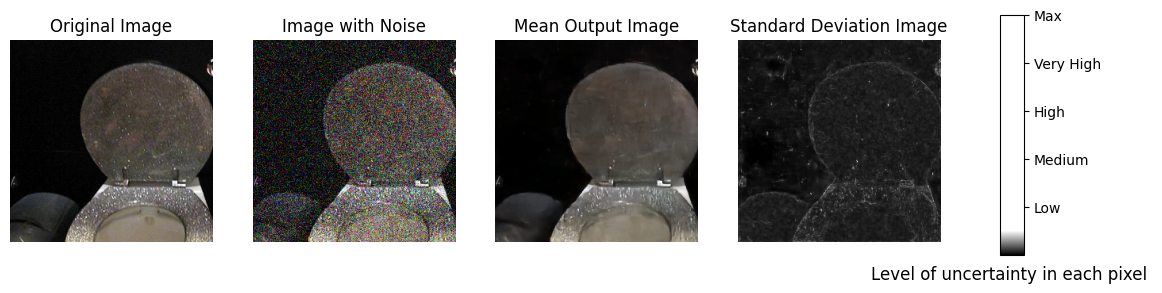

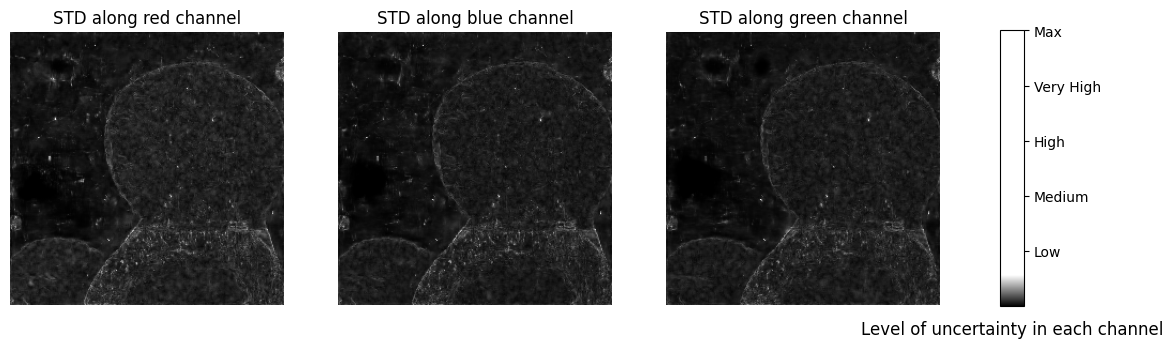

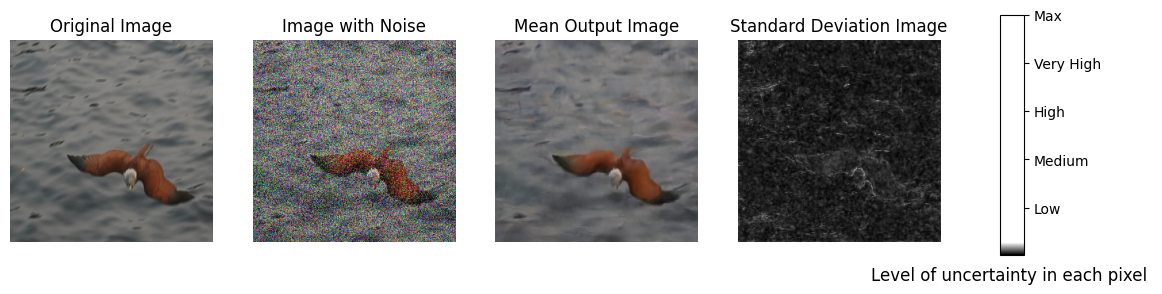

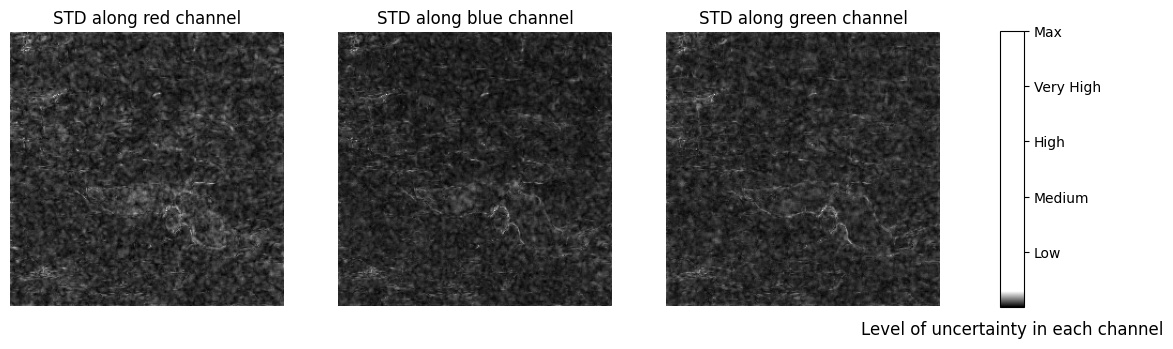

In [20]:
std_b_0 = np.expand_dims(std_p[bottom_indices[0],:,:,0],axis=-1)
std_b_1 = np.expand_dims(std_p[bottom_indices[0],:,:,1],axis=-1)
std_b_2 = np.expand_dims(std_p[bottom_indices[0],:,:,2],axis=-1)
sum_std_b = (std_b_0 + std_b_1 + std_b_2)/3
original_image = images[bottom_indices[0],:,:,:]
noisy_image = noisy_images[bottom_indices[0],:,:,:]
mean_image = image_mean[bottom_indices[0],:,:,:]
plot_results(original_image,noisy_image, mean_image,sum_std_b)
plot_std_results(std_b_0,std_b_1,std_b_2)
std_b_0 = np.expand_dims(std_p[bottom_indices[1],:,:,0],axis=-1)
std_b_1 = np.expand_dims(std_p[bottom_indices[1],:,:,1],axis=-1)
std_b_2 = np.expand_dims(std_p[bottom_indices[1],:,:,2],axis=-1)
sum_std_b = (std_b_0 + std_b_1 + std_b_2)/3
original_image = images[bottom_indices[1],:,:,:]
noisy_image = noisy_images[bottom_indices[1],:,:,:]
mean_image = image_mean[bottom_indices[1],:,:,:]
plot_results(original_image,noisy_image, mean_image,sum_std_b)
plot_std_results(std_b_0,std_b_1,std_b_2)
std_b_0 = np.expand_dims(std_p[bottom_indices[2],:,:,0],axis=-1)
std_b_1 = np.expand_dims(std_p[bottom_indices[2],:,:,1],axis=-1)
std_b_2 = np.expand_dims(std_p[bottom_indices[2],:,:,2],axis=-1)
sum_std_b = (std_b_0 + std_b_1 + std_b_2)/3
original_image = images[bottom_indices[2],:,:,:]
noisy_image = noisy_images[bottom_indices[2],:,:,:]
mean_image = image_mean[bottom_indices[2],:,:,:]
plot_results(original_image,noisy_image, mean_image,sum_std_b)
plot_std_results(std_b_0,std_b_1,std_b_2)
std_b_0 = np.expand_dims(std_p[bottom_indices[3],:,:,0],axis=-1)
std_b_1 = np.expand_dims(std_p[bottom_indices[3],:,:,1],axis=-1)
std_b_2 = np.expand_dims(std_p[bottom_indices[3],:,:,2],axis=-1)
sum_std_b = (std_b_0 + std_b_1 + std_b_2)/3
original_image = images[bottom_indices[3],:,:,:]
noisy_image = noisy_images[bottom_indices[3],:,:,:]
mean_image = image_mean[bottom_indices[3],:,:,:]
plot_results(original_image,noisy_image, mean_image,sum_std_b)
plot_std_results(std_b_0,std_b_1,std_b_2)
std_b_0 = np.expand_dims(std_p[bottom_indices[4],:,:,0],axis=-1)
std_b_1 = np.expand_dims(std_p[bottom_indices[4],:,:,1],axis=-1)
std_b_2 = np.expand_dims(std_p[bottom_indices[4],:,:,2],axis=-1)
sum_std_b = (std_b_0 + std_b_1 + std_b_2)/3
original_image = images[bottom_indices[4],:,:,:]
noisy_image = noisy_images[bottom_indices[4],:,:,:]
mean_image = image_mean[bottom_indices[4],:,:,:]
plot_results(original_image,noisy_image, mean_image,sum_std_b)
plot_std_results(std_b_0,std_b_1,std_b_2)